In [10]:
# 生成数据
import numpy as np
np.random.seed(21)
x = np.random.rand(500, 3)
y = x.dot(np.array([3.5, 2.5, 8.9]))
# 构建映射关系，模拟真实的数据待预测值，映射关系为y = 3.5 + 2.5 * x1 + 8.9 * x2

In [12]:
# 调用sklearn的线性回归模型训练数据
import numpy as np
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt 
%matplotlib inline

In [13]:
# 调用模型
lr = LinearRegression(fit_intercept=True)

# 训练模型
lr.fit(x,y)
print('估计的参数值为:%s' %(lr.coef_))

# 计算R^2
print('R2:%s' %(lr.score(x,y)))

# 任意设定变量，预测目标值
x_test = np.array([2, 4, 5]).reshape(1, -1)
y_hat = lr.predict(x_test)
print('预测值为：%s' %(y_hat))

估计的参数值为:[3.5 2.5 8.9]
R2:1.0
预测值为：[61.5]


In [15]:
# 最小二乘法的矩阵求解
class LR_LS():
    def __init__(self):
        self.w = None
    def fit(self, X, y):
        # 最小二乘法矩阵求解
        self.w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    def predict(self, X):

        # yongyyyo用已经拟合的参数值预测新自变量
        y_pred = X.dot(self.w)
        return y_pred
        
if __name__ == '__main__':
    lr_ls = LR_LS()
    lr_ls.fit(x,y)
    print('估计的参数值： %s' %(lr_ls.w))
    x_test = np.array([2, 4, 5]).reshape(1, -1)
    print('预测值为： %s' %(lr_ls.predict(x_test)))

估计的参数值： [3.5 2.5 8.9]
预测值为： [61.5]


In [22]:
# 梯度下降法
class LR_GD():
    def __init__(self):
        self.w = None
    def fit(self, X, y, alpha=0.02, loss=1e-10):
        #设定步长为0.002，判断是否收敛的条件为1e-10
        y = y.reshape(-1, 1) # 重塑y的维度以便矩阵运算
        [m, d] = np.shape(X) # 自变量的维度
        self.w = np.zeros((d)) # 将参数的初始值定为0
        tol = 1e5
        while tol > loss:
            h_f = X.dot(self.w).reshape(-1, 1)
            theta = self.w + alpha * np.mean(X *(y - h_f), axis=0) # 计算迭代的参数值
            tol = np.sum(np.abs(theta - self.w))
            self.w = theta
    def predict(self, X):
        # 用已经拟合的参数值预测新自变量
        y_pred = X.dot(self.w)
        return y_pred

if __name__ == '__main__':
    lr_gd = LR_GD()
    lr_gd.fit(x,y)
    print('估计的参数值为：%s' %(lr_gd.w))
    x_test = np.array([2, 4, 5]).reshape(1, -1)
    print('预测值为：%s' %(lr_gd.predict(x_test)))               

估计的参数值为：[3.49999998 2.50000003 8.89999999]
预测值为：[61.50000001]


(array([  7.,  17.,  37.,  89., 114., 118.,  65.,  37.,  12.,   4.]),
 array([-2.79183182, -2.22698645, -1.66214108, -1.0972957 , -0.53245033,
         0.03239504,  0.59724041,  1.16208579,  1.72693116,  2.29177653,
         2.8566219 ]),
 <a list of 10 Patch objects>)

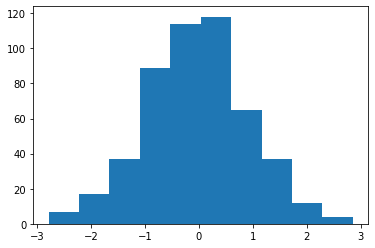

In [25]:
# 加入白噪声
e = np.random.normal(loc=0, scale=1, size=500)
plt.hist(e)

In [27]:
y1 = x.dot(np.array([3.5, 2.5, 8.9])) + e

In [28]:
# 调用模型
lr1 = LinearRegression(fit_intercept=True)

# 训练模型
lr1.fit(x,y1)
print('估计的参数值为:%s' %(lr1.coef_))

# 计算R^2
print('R2:%s' %(lr1.score(x,y1)))

# 任意设定变量，预测目标值
x_test = np.array([2, 4, 5]).reshape(1, -1)
y1_hat = lr1.predict(x_test)
print('预测值为：%s' %(y1_hat))

估计的参数值为:[3.35673675 2.67200128 8.72474066]
R2:0.894166927491615
预测值为：[61.05771249]
